In [ ]:
#By Ivan, Joey, and Mylinh

#Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.spatial.distance as sp
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
our_films = ['Black Panther',  # film 0
             'Zootopia',  # film 1
             'Inside Out',  # film 2
             'The Incredibles',  # film 3
             'Lion King',  # film 4
             'Toy Story',  # film 5
             'Parasite',  # film 6
             'Chicken Little',  # film 7
             'Inception',  # film 8
             'Avatar'   # film 9
                     ]
people = ['Jenny',  # person0
          'Jeremiah',  # person1
          'Joey',  # person2
          'Daud',  # person3
          'Brandon',  # person4
          'Tay',  # person5
          'Seila',  # person6
          'Mylinh',  # person7
          'Ivan',  # person8
          'Celina',  # person9
          'Kenny', # person10
          'Andy', # person11
          'Nora'  # person12
         ]
our_data = np.array([[3,4,3,0,4,0,0,0,0,0],  # person0 - Jenny
                     [5,4,5,5,3,5,0,0,5,1],  # person1 - Jeremiah
                     [4,1,2,2,3,3,0,5,4,2],  # person2 - Joey
                     [5,0,0,0,0,0,5,0,0,5],  # person3 - Daud
                     [4,2,0,5,5,3,0,5,0,0],  # person4 - Brandon
                     [5,2,4,4,5,5,3,4,5,5],  # person5 - Tay
                     [5,3,0,3,2,4,4,0,0,0],  # person6 - Seila
                     [1,0,0,0,0,0,0,0,0,0],  # person7 - Mylinh
                     [4,0,0,5,5,5,0,5,4,2],  # person8 - Ivan
                     [4,5,4,5,4,5,5,2,0,3],  # person9 - Celina
                     [3,3,3,4,0,0,4,0,0,0],  # person10 - Kenny
                     [0,3,2,0,0,3,4,0,0,5],  # person11 - Andy
                     [5,0,2,3,4,1,5,2,4,2]]) # person12 - Nora

In [ ]:
our_feature_list = ['Animated', # feature 0
    'Box Office', # feature 1
    'Budget', # feature 2
    'Soundtrack', # feature 3
    'Awards', # feature 4
    'Media company', # feature 5
    'Rotten Tomatoes' # feature 6
]
# each column is a film and each row is a feature!
our_features = np.array([[0.,1.,1.,1.,1.,1.,0.,1.,0.,1.], # feature0 - animated or not
[1344.,1024.,857.6,633.,968.5,1073.,266.,314.4,829.9,2790.], # feature1 - box office earnings in millions
[200.,150.,175.,92.,45.,30.,11.,60.,160.,237.], # feature2 - budget in millions
[96.,92.,88.,94.,94.,91.,91.,60.,96.,92.], # feature3 - soundtrack rating (according to Google users)
[91.,24.,48.,40.,37.,17.,183.,4.,101.,73.], # feature4 - number of awards won
[0.,2.,1.,1.,2.,1.,3.,2.,3.,3.], # feature5 - production media company. Marvel - 0, Pixar - 1, Disney - 2, other - 3)
[96.,98.,98.,97.,93.,100.,99.,37.,87.,82.]]) # feature6 - Rotten Tomatoes score (in percent)
# normalize our features
s = np.shape(our_features)
our_normalized_features = our_features

for i in np.arange(0,s[0]):
    our_normalized_features[i,:] = (our_normalized_features[i,:]-our_features[i,:].mean())/our_features[i,:].std()

In [34]:
#Methods/Functions

def movie_distance(x,compare):
    # computes the distance between someone "x" who scores each movie and all the people stored in a comparison
    # table "compare"
    
    distances = np.zeros(len(compare)) # create a list where we will save the distance between user x and each person
    for i in np.arange(len(compare)): # for each person in the compare chart
        distances[i] = sp.cosine(x,compare[i,:]) # calculate the distance between person x and the current person
    return distances

def k_nearest(x,compare,k):
    distances = movie_distance(x,compare)   #Calculate distances between user x and all other users in compare
    return distances.argsort()[:k]          #.argsort returns the indices that sorts an array - so, it returns the indices
                                           # in order of smallest to largest values. With [:k], we take the first k indices

def nearest_points(new_point,point_list,k):
    # calculates the k nearest points in a list to a new point
    
    distances = np.sum((point_list - new_point)**2,1) # calculate the distance from the new point to each point in the dataset
    return distances.argsort()[:k] # sort the distances and return the list (indices) of the k nearest points

def movie_prediction(new_person,compare,which_movie,k):
    # predicts the score "new_person" would give to the movie corresponding with column "which_movie"
    # based upon comparing them to the people in "compare" using the k-NN algorithm with k comparisons.
    
    # calculate the k most similar people to the new person
    nearest_folks = nearest_points(new_person, compare, k)
    
    # gather the scores the nearby people give to the movie in question
    nearest_folks_scores = compare[nearest_folks, which_movie]
    
    # the line below eliminates the scores of your neighbors who have also not seen the movie
    nearest_folks_scores = nearest_folks_scores[nearest_folks_scores != 0]
    
    # calculate the average of the remaining scores
    return nearest_folks_scores.mean()
    #could also do: return np.mean(nearest_folks_scores)

def new_centers(x,classifiers):
    # calculates new centers given the data "x" and which class each point corresponds to (in "classifiers")
    
    s1 = np.shape(x) # find out how many dimensions each data point is
    s2 = int(np.max(classifiers)) # find out how many classes there are
    new_c = np.zeros((s1[0],s2+1)) # make a list of centers the right size
    for i in np.arange(s2+1): # for each class...
        new_c[:,i] = np.mean(x[:,classifiers==i],1) # take the mean of each data point in the class
    return new_c

def assign_to_groups(points,centers):
    # calculates the distance between each point in "points" and each center in "centers" 
    # and indicates which center each point is nearest to
    
    s = np.shape(points) # find the shape of the points input (so we no how many points we are sorting)
    s2 = np.shape(centers) # find the shape of the centers (so we know how many classes there are)
    classification = np.zeros(s[1]) # create an output vector that contains the class for each point
    
    for i in np.arange(s[1]): # loop through every point
        
        dist = np.zeros(s2[1]) # make a list of how far the current point is from each center
        
        for j in np.arange(s2[1]): # loop through every center
            
            dist[j] = np.sum((points[:,i] - centers[:,j])**2) # calculate the distance between the current point and current center
        classification[i] = np.argmin(dist) # classify the point as belonging to the group whose center it is furthest from
        
    return classification

def k_means_update(x,c):
    # performs a single step of k-means with data "x" and current centers guess "c"
    
    classes = assign_to_groups(x,c) # figure out which class each point is
    new_c = new_centers(x,classes) # find new centers of each class by taking the means
    return [new_c,classes]

def make_plots(x,c,groups,colors,label):
    # we keep plotting stuff with the same code, so let's make a little shortcut for it
    # this will plot the data points "x" and the centers "c" with the points colored according to the group
    # they are in (as listed in "groups"). The list of colors we use is "colors" and "label" lets us specify
    # which figure we are plotting in

    s = len(colors) # find out how many colors there are
    plt.figure(label) # open the figure we were told to use
    plt.clf # clear that figure
    
    for i in np.arange(s): # for every group...
        plt.figure(label) # open the correct figure
        plt.plot(x[0,groups==i],x[1,groups==i],colors[i]+'o') # plot the points in that group with circles of that color
        plt.plot(c[0,i],c[1,i],colors[i]+'*',markersize=15) # plot the center of that group with a star of that color
        plt.axis([-1,10,-1,10])
        plt.xlabel(our_films[1])
        plt.ylabel(our_films[2])
    plt.show()

def random_initial_guess(x,k):
    # a little script to make our initial guess just be random
    
    s = np.shape(x) # figure out how many dimensions the points are
    c = np.zeros((s[0],k)) # make our centers array
    for i in np.arange(s[0]): # for every dimension
        for j in np.arange(k): # and every center
            # pick a random number that is between the maximum and minimum of the data for that dimension
            c[i,j] = np.random.rand()*(np.max(x[i,:])-np.min(x[i,:])) + np.min(x[i,:])
    return c
    
def k_means(x,k,tol):
    # runs the k-means algorithm in full
    
    c = random_initial_guess(x,k) # come up with a random starting guess
    check = 1 # set the checking variable to make sure we take at least one step
    while check > tol: # as long as our checking variable is bigger than the tolerance...
        (new_c,classes) = k_means_update(x,c) # update the centers
        
        # and check how different our old centers are from our new ones!
        c_old = c
        c = new_c
        check = np.sum((c_old - c)**2)
    return [c,classes]

In [ ]:
#2

predicted_our_data = np.array([[3,4,3,0,4,0,0,0,0,0],  # person0 - Jenny
                     [5,4,5,5,3,5,0,0,5,1],  # person1 - Jeremiah
                     [4,1,2,2,3,3,0,5,4,2],  # person2 - Joey
                     [5,0,0,0,0,0,5,0,0,5],  # person3 - Daud
                     [4,2,0,5,5,3,0,5,0,0],  # person4 - Brandon
                     [5,2,4,4,5,5,3,4,5,5],  # person5 - Tay
                     [5,3,0,3,2,4,4,0,0,0],  # person6 - Seila
                     [1,0,0,0,0,0,0,0,0,0],  # person7 - Mylinh
                     [4,0,0,5,5,5,0,5,4,2],  # person8 - Ivan
                     [4,5,4,5,4,5,5,2,0,3],  # person9 - Celina
                     [3,3,3,4,0,0,4,0,0,0],  # person10 - Kenny
                     [0,3,2,0,0,3,4,0,0,5],  # person11 - Andy
                     [5,0,2,3,4,1,5,2,4,2]]) # person12 - Nora

for x in np.arange(0, 13):
    for y in np.arange(0, 10):
        if predicted_our_data[x, y] == 0:
            predicted_our_data[x, y] = movie_prediction(predicted_our_data[x, :], our_data, y, 7) 
            # K must be greater than 6, used 7 as it seems to replace all the 0s successfully and contains more variety than the other high                   K-values
print(predicted_our_data)

#2b Find k most similar people to me using predicted_our_data
print("The most similar people to me based on movie ratings:")
k_nearest(predicted_our_data[8, :], predicted_our_data, 4)

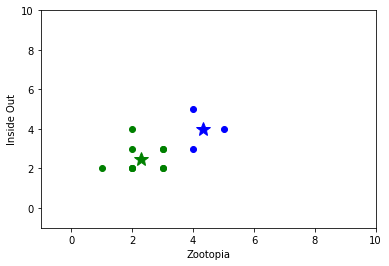

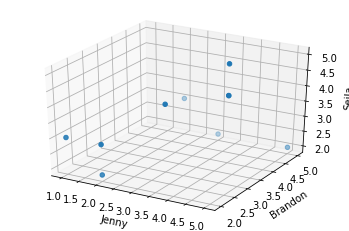

In [50]:
#3

#2D Plot
#Clusters of movies that have similar scores across the classroom - Zootopia and Inside Out
#K-value would be 2 as it has to be greater than one and has more data variety compared to the higher k-values
#Points and centers seem to change sometimes when it runs
x = np.array([predicted_our_data[:, 1], predicted_our_data[:, 2]])
(new_c, classes) = k_means(x, 2, 0.01) 
make_plots(x, new_c, classes,['b', 'g'], 31)

#3D Plot
#NOTE - Did not plot the centers and organized cluster data in the Plotting section
#Clusters comparing Jenny, Brandon, and Seila's scores/ratings
# K-value is 2 because there seems tos be around 2 clusters of a few data points

#The organized cluster data and centers
x = np.array([predicted_our_data[2,:], predicted_our_data[4,:], predicted_our_data[6,:]])
(new_c2, classes2) = k_means(x, 2, 0.05)

#Plotting
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(predicted_our_data[2,:], predicted_our_data[4,:], predicted_our_data[6,:])
ax.set_xlabel(people[0])
ax.set_ylabel(people[4])
ax.set_zlabel(people[6])
plt.show()